# Tries

## Lesson Overview

> A **trie** is a specialized tree that is used to store words by storing nodes as letters.

Tries are a particular type of specialized tree, most often used for string storage. Tries are also known as "prefix trees", as they can be used to represent words and prefixes in a language. For this lesson, we'll be using the English language, but tries can be used in any language, as long as you're consistent about the structure.

To visualize an English-language trie, imagine a tree where every node has up to 26 children, one for every letter of the alphabet. Each node also can store an `is_word` boolean, which is `True` if the path from the root to the node forms an English word and `False` otherwise. Below is such a tree structure:

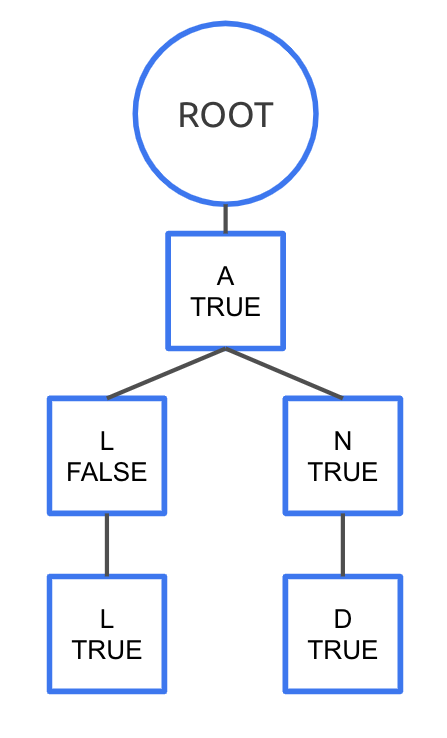

In this example:

*   The root stores nothing; it can just have up to 26 children. 
*   Our 'a' node has two children, 'l' and 'n'. Since "a" is a word, it stores `True`.
*  "al" is not an English word, but "an" is, so the 'l' and 'n' children of 'a' store `False` and `True`, respectively.
*  The children of 'n' ('l' and 'd') both form the words 'all' and 'and', so they both store `True`.

You can use a trie to quickly calculate if a string is a prefix of any words, because if the prefix you find doesn't have any children, your trie doesn't store any valid words with that prefix. So, for instance, checking this mini-trie for the word "android" returns `False` because our 'd' node has no children.

### Tries in code

A `Trie` class likely requires tweaks to the existing `Tree` class, depending on how you want to implement the node structure.

In [ ]:
#persistent
class Node:

  def __init__(self, letter, is_word):
    self.letter = letter
    self.parent = None
    self.children = {}
    self.is_word = is_word

  def add_child(self, letter, is_word): 
    # Note that we don't pass in a node, here; we just pass in a letter and
    # True if that forms a complete word. We set up the Node inside of the
    # method and allocate it to a spot in the children dictionary.
    if letter not in self.children:
      node = Node(letter, is_word)
      self.children[letter] = node
      # We also set the node's parent to be this node.
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def __str__(self):
    return '%s (%s): %s' % (
        self.letter, self.is_word, [node.letter for node in self.children])

  def __repr__(self):
    return '%s (%s): %s' % (
        self.letter, self.is_word, [node.letter for node in self.children])

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      # If the prefix is the empty string, we return False.
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      # This is a recursive base case; if the prefix is empty, we've arrived
      # at the node that encompasses the prefix, so we can return true.
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      # The next letter isn't in our trie, so the prefix can't be in there.
      return False

We're attempting to be a bit more efficient with storage by making our children a dictionary rather than a list of 26 possible children. By using a dictionary, we're only allocating space for a letter if we have an associated node, and we're saving space on letter combinations that don't occur (like 'xv' or 'qz').

## Question 1

Which of the following statements about a trie are true?

**a)** If a trie node stores `is_word` as `False` then all of its descendants must also store `is_word` as `False`.

**b)** A trie node should always have exactly 26 available spots for children.

**c)** A trie allows for quick lookup of words based on prefixes.

**d)** An in-order traversal of the trie will output all of the words in a trie in alphabetical order.

### Solution

The correct answer is **c)**.

**a)** For example, `'al'` is not a word but `'all'` is a word.

**b)** If you're using Spanish, for example, there are additional letters not present in English. You may also implement your trie such that you don't pre-allocate space for certain unlikely letter combinations (like `'qx'`).

**d)** A pre-order traversal of the trie will do that.

## Question 2

Which of the following real-world use cases are best represented as a trie?

**a)** Storing strings by their suffixes.

**b)** Implementing a dictionary of words in another language.

**c)** Storing relationships between family members.

**d)** Sorting words into alphabetical order.

### Solution

The correct answer is **b)**.

**a)** A trie is a prefix tree, typically. You could potentially implement it as a suffix tree, but that would require changes to its implementation.

**c)** That's likely best stored via a tree.

**d)** While you can sort words into alphabetical order using a trie, it's probably simpler to use a list and sort it.

## Question 3

Recall that nodes within the trie store a `is_word` attribute if the path from the root to that node forms a complete word.

Write a `has_word` method for the `Trie` class, which takes a string as an argument returns `True` if the word is in our trie and `False` otherwise.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

Loop through the characters in the word and move down the trie. If you hit the end of the string and the node has `is_word` as `True`, then you've found the word. Otherwise, the word isn't in the trie. There are a couple failure cases, here:

*   A child isn't present for a specific character.
*   The letters are all in the trie, but `is_word == False`.

Make sure you check them both!

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
trie = Trie(Node(None, False))
trie.root.add_child('a', True)
trie.root.add_child('i', True)
trie.root.add_child('s', False)
trie.root.children['s'].add_child('o', True)
trie.root.children['a'].add_child('n', True)
trie.root.children['i'].add_child('n', True)

print(trie.has_word('in'))
# Should print: True

print(trie.has_word('integer'))
# Should print: False

print(trie.has_word('an'))
# Should print: True

print(trie.has_word('ant'))
# Should print: False

### Solution

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      # We check to see if the letter is present in the trie, and move to the
      # child if that's the case.
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    # Once we've hit the end of our word, we should check to see if the node
    # is marked as a word and return that value.
    return current_node.is_word

## Question 4

Let's write a method that adds new words to the trie. A word should be split up into its letters, with each letter added as a child of the previous letter. Doing that should result in the word being properly stored within the trie (keeping in mind that the final letter should also have its `is_word` attribute set to `True`).

Write an `add_word` method for the `Trie` class, which takes a string as an argument and adds the word to the trie.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

A `while` loop should be sufficient for this, but be sure to account for the following cases:

*   Some of the letters are already in the trie.
*   All of the letters are already in the trie.

Don't add a new child every time; make sure to check if the child is already in the trie first.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
trie = Trie(Node(None, False))
trie.add_word('in')
trie.add_word('an')
trie.add_word('so')

print(trie.has_word('in'))
# Should print: True

print(trie.has_word('integer'))
# Should print: False

print(trie.has_word('an'))
# Should print: True

print(trie.has_word('ant'))
# Should print: False

### Solution

This can be written very similarly to `has_word`, just with two alterations. The first is if the letter isn't in the current node's children, you should add it, and instead of returning `current_node.is_word`, we can just set that to `True` since we've reached the end of our word.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        # Words need to be added manually to our trie, so we should add new
        # children but not set their is_word flag to True until the word is
        # added.
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

## Question 5

Now that we can add words to a trie, let's write a method to determine the rough size of a trie. Rather than counting all the nodes, let's count all the words we've stored. You'll have to visit every node in the tree, so this way be a good time to use a tree traversal technique of your choice (since we don't need the words in any order).

Write a `count_words` method that returns the number of words stored in a `Trie` object.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

You'll have to do a tree traversal to make sure you hit every node, but the key here is not counting the nodes you traverse. Instead, check `is_word` and increment your count if and only if that is `True`. A pre-order traversal is recommended if you're going to pick any, but it doesn't really matter.

As with previous tree traversal recursions, you may need a helper method, as outlined below.

```python
def count_words(self):
  return _count_words_helper(self.root)

def _count_words_helper(self, current_node):
  # Check if the current node is a word.
  # Return the count + the count of all the child subtrees.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
trie = Trie(Node(None, False))
trie.add_word('in')
trie.add_word('an')
trie.add_word('so')

print(trie.count_words())
# Should print: 3

### Solution

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    return self._count_words_helper(self.root)
    
  def _count_words_helper(self, current_node):
    count = 0
    if current_node.is_word:
      count += 1
    for _, child in current_node.children.items():
      count += self._count_words_helper(child)
    return count

## Question 6

An interesting property of tries is that they can be used to sort a list of words, provided you've correctly stored and retrieved them. Depending on your implementation, that may require some extra code, but it can be done.

Write a `get_sorted_words` method that returns the words in a given trie in sorted order. While you could call `.sort()` on the list of words at the end, try to avoid manually sorting the words and instead use the trie's structure to your advantage.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    return self._count_words_helper(self.root)
    
  def _count_words_helper(self, current_node):
    count = 0
    if current_node.is_word:
      count += 1
    for _, child in current_node.children.items():
      count += self._count_words_helper(child)
    return count

  def get_sorted_words(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

There's one hazard here, based on our implementation. Since we use a dictionary to store the children, the keys aren't in any particular order. You should call `.children.keys()` to get the letters, and then call `.sort()` on that to get the keys in the correct order.

Beyond that, this is exactly what a pre-order tree traversal is for. Recall that pre-order traversal processes the current node (the shortest word), then the node's left subtree and right subtree. That will, with a sorted list of keys, get you all the words in alphabetical order. Just, as you're building each word, remember to skip the root node; it doesn't store a letter.

If you're looking for ways to get the recursion started, try this:

```python
def get_sorted_words(self):
  words = []
  self._get_sorted_words_helper(self, self.root, '', words)
  return words

def _get_sorted_words_helper(self, current_node, current_word, words):
  # Add the current node's letter to current_word.
  # Check if the current node is a word; if so, add the current word to words.
  # Sort the keys of the current node's children.
  # Iterate through those, calling _get_sorted_words_helper recursively.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
trie = Trie(Node(None, False))
trie.add_word('in')
trie.add_word('an')
trie.add_word('so')

print(trie.get_sorted_words())
# Should print: ['an', 'in', 'so']

### Solution

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    return self._count_words_helper(self.root)
    
  def _count_words_helper(self, current_node):
    count = 0
    if current_node.is_word:
      count += 1
    for _, child in current_node.children.items():
      count += self._count_words_helper(child)
    return count

  def get_sorted_words(self):
    words = []
    self._get_sorted_words_helper(self.root, '', words)
    return words

  def _get_sorted_words_helper(self, current_node, current_word, words):
    if current_node != self.root:
      # The root doesn't store a letter, so this can lead to some odd results.
      current_word += current_node.letter
    if current_node.is_word:
      words.append(current_word)
    sorted_children = sorted(current_node.children.keys())
    for letter in sorted_children:
      self._get_sorted_words_helper(
          current_node.children[letter], current_word, words)

## Question 7

Your coworker has been working on a `Trie` class that differs slightly from yours, but they're having an issue with their implementation. They've developed a `remove_word` method that goes through the trie and removes a word (and its corresponding letters) from the trie, but it's causing some issues. Can you identify what's wrong with their `remove_word` method and fix it?

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    return self._count_words_helper(self.root)
    
  def _count_words_helper(self, current_node):
    count = 0
    if current_node.is_word:
      count += 1
    for _, child in current_node.children.items():
      count += self._count_words_helper(child)
    return count

  def get_sorted_words(self):
    words = []
    self._get_sorted_words_helper(self.root, '', words)
    return words

  def _get_sorted_words_helper(self, current_node, current_word, words):
    if current_node != self.root:
      current_word += current_node.letter
    if current_node.is_word:
      words.append(current_word)
    sorted_children = sorted(current_node.children.keys())
    for letter in sorted_children:
      self._get_sorted_words_helper(
          current_node.children[letter], current_word, words)

  def remove_word(self, word):
    if not word:
      return
    self._remove_word_helper(self.root, word)

  def _remove_word_helper(self, current_node, remaining_letters):
    next_letter = remaining_letters[0]
    remaining_letters = remaining_letters[1:]
    if next_letter in current_node.children:
      if remaining_letters:
        self._remove_word_helper(
            current_node.children[next_letter], remaining_letters)
      current_node.children.pop(next_letter)

### Hint

Try drawing out the following trie and see what happens to its structure after a call to `remove_word('ant')`. What happens to the other words in the trie when you make those calls?

```python
trie = Trie(Node(None, False))
trie.add_word('in')
trie.add_word('an')
trie.add_word('ant')
trie.add_word('so')
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
trie = Trie(Node(None, False))
trie.add_word('in')
trie.add_word('an')
trie.add_word('ant')
trie.add_word('so')

trie.remove_word('ant')
print(trie.has_word('ant'))
# Should print: False

print(trie.has_word('an'))
# Should print: True

### Solution

The issue here is that `remove_word` deletes nodes, even if they're part of other words, which can cause issues in the trie's structure. If you have the words 'belt' and 'bell' in your trie and call `trie.remove_word('bell')`, a `has_word` check for 'belt' will return `False` because the 'b', 'e', and 'l' nodes have all been deleted.

Instead, what this method should be doing is first setting the node's `is_word` to `False` and then checking and removing the node only if it has no children. For nodes farther up the tree, check to make sure they have no children *and* that they're not also words, otherwise you risk deleting additional words unintentionally. This way, you clean up the trie's structure without negatively impacting other words in the trie. You can do that a few different ways; in our implementation, we opted to return `True` if the node should be deleted and `False` otherwise.

In [ ]:
class Trie:

  def __init__(self, root_node):
    self.root = root_node

  def has_prefix(self, prefix):
    if not prefix:
      return False
    return self.find_prefix_helper(root, prefix)

  def find_prefix_helper(self, current_node, prefix):
    if not prefix:
      return True
    next_letter = prefix[0]
    remaining_letters = prefix[1:]
    if next_letter in current_node.children:
      return self.find_prefix_helper(
          current_node.children[next_letter], remaining_letters)
    else:
      return False

  def has_word(self, word):
    current_node = self.root
    for letter in word:
      if letter in current_node.children:
        current_node = current_node.children[letter]
      else:
        return False
    return current_node.is_word

  def add_word(self, word):
    current_node = self.root
    for letter in word:
      if letter not in current_node.children:
        current_node.add_child(letter, False)
      current_node = current_node.children[letter]
    current_node.is_word = True

  def count_words(self):
    return self._count_words_helper(self.root)
    
  def _count_words_helper(self, current_node):
    count = 0
    if current_node.is_word:
      count += 1
    for _, child in current_node.children.items():
      count += self._count_words_helper(child)
    return count

  def get_sorted_words(self):
    words = []
    self._get_sorted_words_helper(self.root, '', words)
    return words

  def _get_sorted_words_helper(self, current_node, current_word, words):
    if current_node != self.root:
      current_word += current_node.letter
    if current_node.is_word:
      words.append(current_word)
    sorted_children = sorted(current_node.children.keys())
    for letter in sorted_children:
      self._get_sorted_words_helper(
          current_node.children[letter], current_word, words)

  def remove_word(self, word):
    if not word:
      return
    self._remove_word_helper(self.root, word)

  def _remove_word_helper(self, current_node, remaining_letters):
    if not remaining_letters:
      # When we find the word, make sure we indicate it's going to be removed.
      current_node.is_word = False
    else:
      # Otherwise, we need to keep digging into the tree to find the end of
      # the word we're trying to remove.
      next_letter = remaining_letters[0]
      remaining_letters = remaining_letters[1:]
      if next_letter in current_node.children:
        remove_node = self._remove_word_helper(
            current_node.children[next_letter], remaining_letters)
        if remove_node:
          current_node.children.pop(next_letter)
    # We should clean up our trie's structure by removing a node if it has no
    # children and it's not a word; that means it was only added as part of the 
    # word we're trying to remove.
    return len(current_node.children) == 0 and not current_node.is_word